In [ ]:
# Import required libraries
import pandas as pd
import plotly
import plotly.express as px
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

FCC_df =  pd.read_excel('FCC.xlsx')
FCC_df['year'] = FCC_df['date'].dt.year

app = dash.Dash(__name__)

app.layout = html.Div([

    html.H1("FreeCodeCamp Data", style={'text-align': 'center'}),

    dcc.Dropdown(id="year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016}],
                 # multi = False,
                 value = 2015,
                 style = {'width': "40%"}
                 ),
    html.Br(),
    dcc.Graph(id='plot')

])

@app.callback(
    Output('plot','figure'),
    [Input('year','value')]
)

def update_fig(year_slctd):
    dff = FCC_df.copy()
    dff = dff[dff["year"] == year_slctd]
    
    fig = px.scatter(
        data_frame = dff,
        x="Recommends",
        y="Read ratio")
    # fig.update_traces(textposition='top center')
    return(fig)


if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


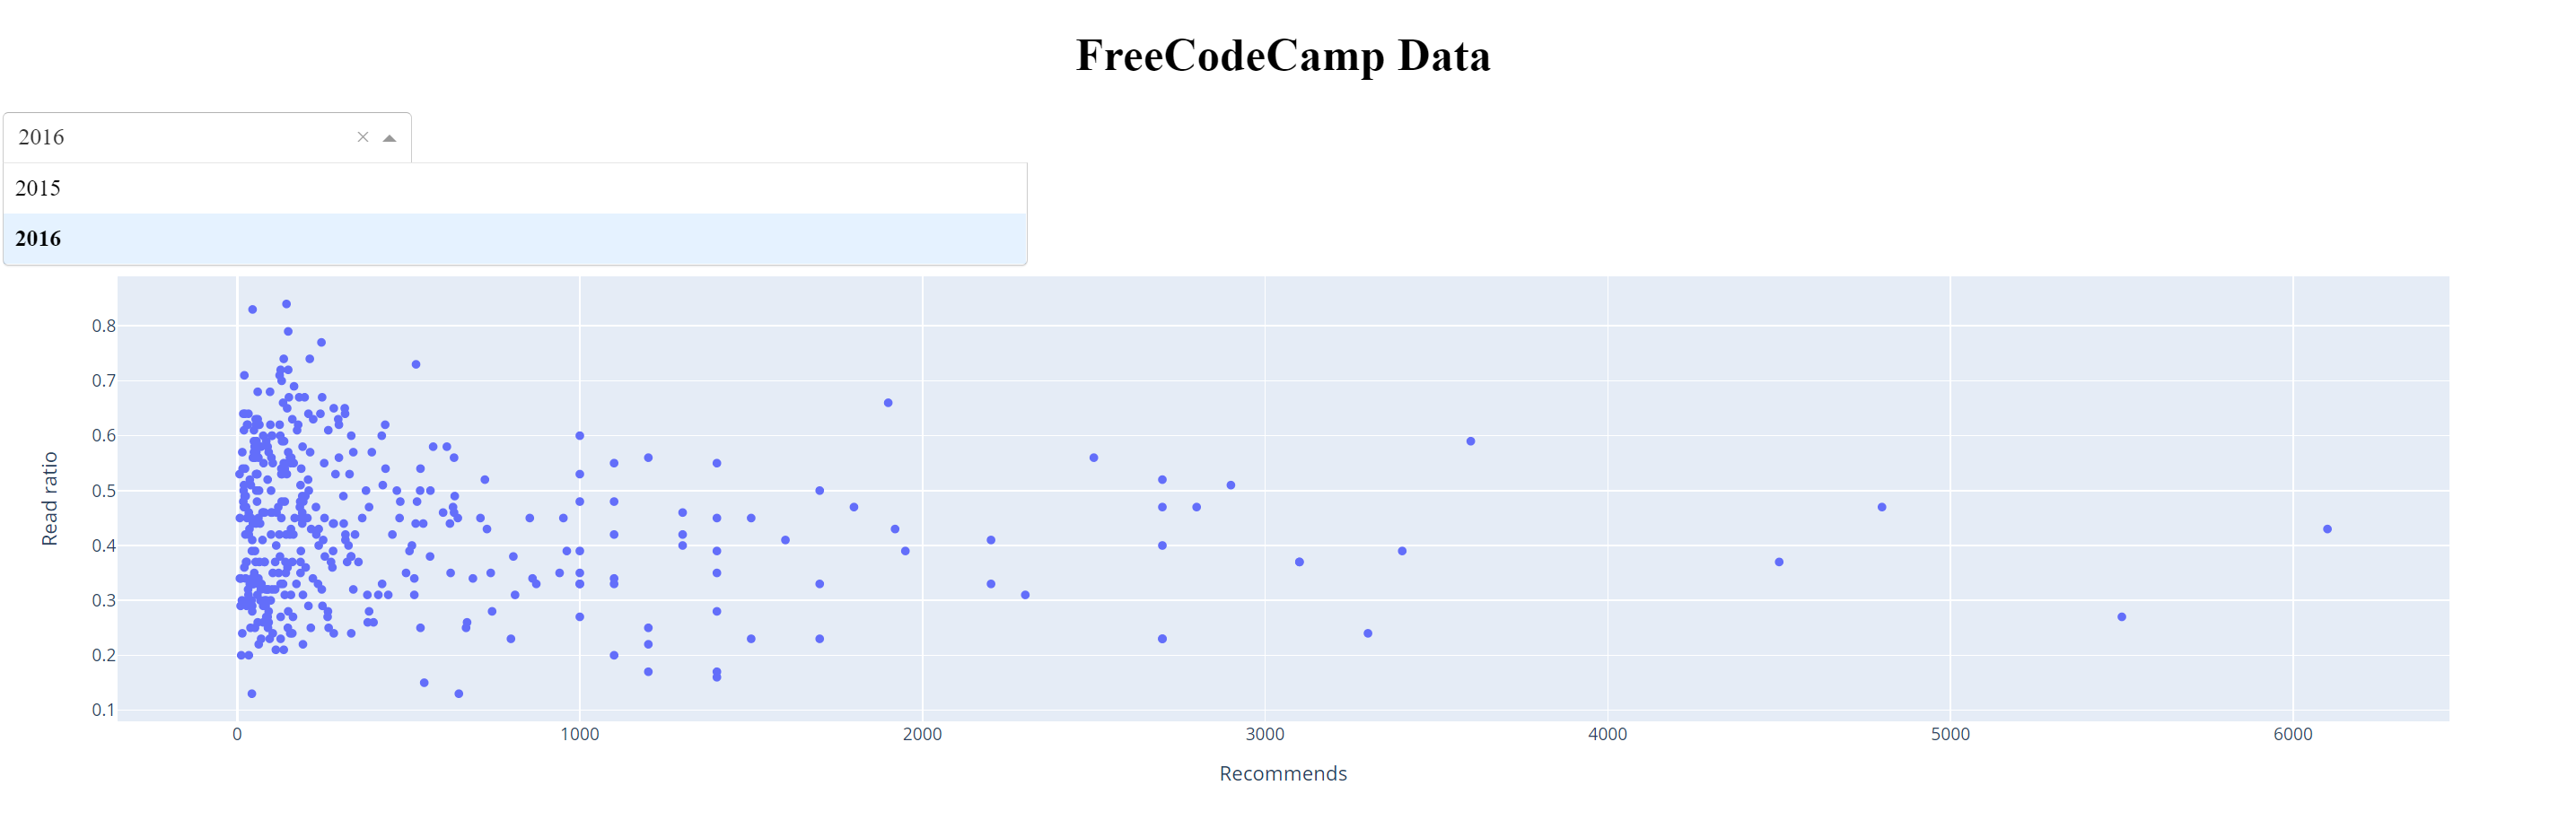